In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv("train_data.csv")

In [5]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,30-06-2015,5735,568,1,1,0,0
1,2,2,30-06-2015,9863,877,1,1,0,0
2,3,2,30-06-2015,13261,1072,1,1,0,1
3,4,2,30-06-2015,13106,1488,1,1,0,0
4,5,2,30-06-2015,6635,645,1,1,0,0


In [6]:
train_data.shape

(575670, 9)

In [7]:
test_data = pd.read_csv("test_data.csv")

In [8]:
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,1,1,0,1
1,2,5,31-07-2015,1,1,0,1
2,3,5,31-07-2015,1,1,0,1
3,4,5,31-07-2015,1,1,0,1
4,5,5,31-07-2015,1,1,0,1


In [9]:
test_data.shape

(34565, 7)

In [10]:
test_val_data = pd.read_csv("test_data_hidden.csv")

In [11]:
test_val_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [12]:
test_val_data.shape

(34565, 9)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575670 entries, 0 to 575669
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          575670 non-null  int64 
 1   DayOfWeek      575670 non-null  int64 
 2   Date           575670 non-null  object
 3   Sales          575670 non-null  int64 
 4   Customers      575670 non-null  int64 
 5   Open           575670 non-null  int64 
 6   Promo          575670 non-null  int64 
 7   StateHoliday   575670 non-null  object
 8   SchoolHoliday  575670 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 39.5+ MB


In [14]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
test_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
test_val_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
train_data['Store'].value_counts()

233    546
325    546
309    546
821    546
310    546
      ... 
555    362
677    362
778    362
952    362
512    362
Name: Store, Length: 1115, dtype: int64

In [18]:
test_data['Store'].value_counts()

32      31
245     31
437     31
405     31
373     31
        ..
906     31
938     31
970     31
1002    31
1087    31
Name: Store, Length: 1115, dtype: int64

In [19]:
train_data['DayOfWeek'].value_counts()

1    82290
4    82290
5    82290
6    82290
7    82290
2    82110
3    82110
Name: DayOfWeek, dtype: int64

In [20]:
test_data['DayOfWeek'].value_counts()

3    5575
4    5575
5    5575
1    4460
2    4460
6    4460
7    4460
Name: DayOfWeek, dtype: int64

In [21]:
train_data['Open'].unique()

array([1, 0], dtype=int64)

In [22]:
test_data['Open'].unique()

array([1, 0], dtype=int64)

In [23]:
train_data['Open'].value_counts()

1    476261
0     99409
Name: Open, dtype: int64

In [24]:
test_data['Open'].value_counts()

1    30188
0     4377
Name: Open, dtype: int64

In [25]:
train_data['Promo'].value_counts()

0    352610
1    223060
Name: Promo, dtype: int64

In [26]:
test_data['Promo'].value_counts()

0    20070
1    14495
Name: Promo, dtype: int64

In [27]:
train_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [28]:
test_data['StateHoliday'].unique()

array([0], dtype=int64)

In [29]:
train_data['StateHoliday'].value_counts()

0    491194
0     65536
a     12610
b      4460
c      1870
Name: StateHoliday, dtype: int64

In [30]:
test_data['StateHoliday'].value_counts()

0    34565
Name: StateHoliday, dtype: int64

In [31]:
train_data['SchoolHoliday'].value_counts()

0    483552
1     92118
Name: SchoolHoliday, dtype: int64

In [32]:
test_data['SchoolHoliday'].value_counts()

0    21788
1    12777
Name: SchoolHoliday, dtype: int64

In [33]:
test_val_data.sort_values(['Store'],inplace=True)

In [34]:
test_data.sort_values(['Store'],inplace=True)

In [35]:
train_data.shape, test_data.shape, test_val_data.shape

((575670, 9), (34565, 7), (34565, 9))

In [36]:
combine_data = train_data.append(test_val_data, ignore_index=True)

In [37]:
combine_data = combine_data.append(test_data, ignore_index=True)

In [38]:
combine_data.shape

(644800, 9)

In [39]:
combine_data['year'] = pd.to_datetime(combine_data['Date'], format="%d-%m-%Y").dt.year

In [40]:
combine_data['month'] = pd.to_datetime(combine_data['Date'], format="%d-%m-%Y").dt.month

In [41]:
combine_data['day'] = pd.to_datetime(combine_data['Date'], format="%d-%m-%Y").dt.day

In [42]:
combine_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,2,30-06-2015,5735.0,568.0,1,1,0,0,2015,6,30
1,2,2,30-06-2015,9863.0,877.0,1,1,0,0,2015,6,30
2,3,2,30-06-2015,13261.0,1072.0,1,1,0,1,2015,6,30
3,4,2,30-06-2015,13106.0,1488.0,1,1,0,0,2015,6,30
4,5,2,30-06-2015,6635.0,645.0,1,1,0,0,2015,6,30


In [43]:
combine_data['year'] = combine_data['year'].replace({2014 : 0, 2015 : 1})

In [44]:
combine_data['StateHoliday'] = combine_data['StateHoliday'].replace({'0' : 0, 'a' : 1, 'b' : 2, 'c' : 3})

In [45]:
combine_data1 = pd.get_dummies(combine_data, columns=['Store','DayOfWeek','Open','Promo','StateHoliday',
                                                      'SchoolHoliday','year','month','day'], drop_first=True)

In [46]:
combine_data1.shape

(644800, 1171)

In [47]:
combine_data1.head()

,Date,Sales,Customers,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,30-06-2015,5735.0,568.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,30-06-2015,9863.0,877.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,30-06-2015,13261.0,1072.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,30-06-2015,13106.0,1488.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,30-06-2015,6635.0,645.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
combine_data2 = pd.get_dummies(combine_data, columns= ['DayOfWeek','Open','Promo','StateHoliday',
                                                      'SchoolHoliday','year','month','day'], drop_first=True)

In [49]:
combine_data2.shape

(644800, 58)

In [50]:
combine_data2.head()

,Store,Date,Sales,Customers,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,1,30-06-2015,5735.0,568.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,30-06-2015,9863.0,877.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,30-06-2015,13261.0,1072.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,30-06-2015,13106.0,1488.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,30-06-2015,6635.0,645.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
train_with_store = combine_data1[:575670]
test_val_with_store = combine_data1[575670:610235]
test_with_store = combine_data1[610235:]

In [52]:
train_with_store.reset_index(drop=True, inplace=True)
test_val_with_store.reset_index(drop=True, inplace = True)
test_with_store.reset_index(drop=True, inplace = True)

In [53]:
train_with_store.shape, test_val_with_store.shape, test_with_store.shape

((575670, 1171), (34565, 1171), (34565, 1171))

In [54]:
train_no_store = combine_data2[:575670]
test_val_no_store = combine_data2[575670:610235]
test_no_store = combine_data2[610235:]

In [55]:
train_no_store.reset_index(drop=True, inplace=True)
test_val_no_store.reset_index(drop=True, inplace = True)
test_no_store.reset_index(drop =True, inplace = True)

In [56]:
train_no_store.shape, test_val_no_store.shape, test_no_store.shape

((575670, 58), (34565, 58), (34565, 58))

# Linear Regression with store 

In [57]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [58]:
X_train_with_store = train_with_store.drop(['Sales','Date','Customers'], axis = 1)
Y_train_with_store = train_with_store['Sales']
X_val_train_with_store = test_val_with_store.drop(['Sales','Date','Customers'], axis = 1)
Y_val_train_with_store = test_val_with_store['Sales']

In [59]:
X_train_with_store.shape, Y_train_with_store.shape

((575670, 1168), (575670,))

In [60]:
X_val_train_with_store.shape, Y_val_train_with_store.shape

((34565, 1168), (34565,))

In [61]:
lr_model_1 = LinearRegression()

In [62]:
lr_model_1.fit(X_train_with_store, Y_train_with_store)

LinearRegression()

In [63]:
Y_pred_with_store = lr_model_1.predict(X_val_train_with_store)

In [64]:
print("MSE", np.sqrt(mean_squared_error(y_true= Y_val_train_with_store, y_pred= Y_pred_with_store)))
print("MAE", mean_absolute_error(y_true= Y_val_train_with_store, y_pred= Y_pred_with_store))
print("Train model with store score",lr_model_1.score(X_train_with_store, Y_train_with_store))
print("Test model with store score", lr_model_1.score(X_val_train_with_store, Y_val_train_with_store))

MSE 1406.332155449001
MAE 1036.5185650538701
Train model with store score 0.8470218338025696
Test model with store score 0.8479274053303684


# Linear Regression without store

In [65]:
X_train_no_store = train_no_store.drop(['Sales','Date','Customers'], axis = 1)
Y_train_no_store = train_no_store['Sales']
X_val_train_no_store = test_val_no_store.drop(['Sales','Date','Customers'], axis = 1)
Y_val_train_no_store = test_val_no_store['Sales']

In [66]:
X_train_no_store.shape, Y_train_no_store.shape

((575670, 55), (575670,))

In [67]:
X_val_train_no_store.shape, Y_val_train_no_store.shape

((34565, 55), (34565,))

In [68]:
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train_no_store,Y_train_no_store)

LinearRegression()

In [69]:
Y_pred_no_store = lr_model_2.predict(X_val_train_no_store)

In [70]:
print("MSE", np.sqrt(mean_squared_error(y_true= Y_val_train_no_store, y_pred= Y_pred_no_store)))
print("MAE", mean_absolute_error(y_true= Y_val_train_no_store, y_pred= Y_pred_no_store))
print("Train model no store score",lr_model_2.score(X_train_no_store, Y_train_no_store))
print("Test model no store score", lr_model_2.score(X_val_train_no_store, Y_val_train_no_store))

MSE 2524.82714881026
MAE 1740.367146023794
Train model no store score 0.5770942922675546
Test model no store score 0.5098393480730494


# Linear Regression separate model for each store

In [74]:
Y_pred = np.zeros(test_val_data.shape[0])

In [75]:
X_train = train_no_store.groupby(['Store'])
X_test = test_val_no_store.groupby(['Store'])

In [76]:
for i in range(1 , 1116):
    x = X_train.get_group(i)
    y = X_test.get_group(i)
    
    x_sub_train = x.drop(['Sales','Date','Store','Customers'], axis = 1)
    y_sub_train = x['Sales']
    x_sub_test = y.drop(['Sales','Date','Store','Customers'], axis = 1)
    y_sub_test = y['Sales']
    
    lr_model = LinearRegression()
    lr_model.fit(x_sub_train, y_sub_train)
    pred = lr_model.predict(x_sub_test)
    
    a = 0
    for j in y.index:
        Y_pred[j] = pred[a]
        a+=1

print("MSE", np.sqrt(mean_squared_error(y_pred= Y_pred, y_true=test_val_data['Sales'])))
print("MAE", mean_absolute_error(y_pred= Y_pred, y_true=test_val_data['Sales']))
        

MSE 3.0437284602955636e+16
MAE 1176220133020464.5


# Average Ensemble model of First and Second Model

In [77]:
Final_pred = (Y_pred_with_store + Y_pred_no_store) / 2

print("MSE", np.sqrt(mean_squared_error(y_pred= Final_pred, y_true=test_val_data['Sales'])))
print("MAE", mean_absolute_error(y_pred= Final_pred, y_true=test_val_data['Sales']))

MSE 1780.8030436984134
MAE 1287.2750578763003


# Weighted Average Ensemble model of First and second Model

In [78]:
Final_pred_w = (Y_pred_with_store + Y_pred_no_store) / 2

print("MSE", np.sqrt(mean_squared_error(y_pred= Final_pred_w, y_true=test_val_data['Sales'])))
print("MAE", mean_absolute_error(y_pred= Final_pred_w, y_true=test_val_data['Sales']))

MSE 1780.8030436984134
MAE 1287.2750578763003


# Apply Regularization on First model

In [79]:
x_train = train_with_store.drop(['Sales','Date','Customers'], axis = 1)
y_train = train_with_store['Sales']
x_test = test_val_with_store.drop(['Sales','Date','Customers'], axis = 1)
y_test = test_val_with_store['Sales']

lr = Ridge(alpha=10)
lr.fit(x_train, y_train)

pred_ = lr.predict(x_test)

print("MSE",np.sqrt(mean_squared_error(y_pred=pred_, y_true= y_test)))
print("MAE", mean_absolute_error(y_pred=pred_, y_true= y_test))
print("Train model score", lr.score(x_train, y_train))
print("Test model score", lr.score(x_test, y_test))

MSE 1410.9455343181571
MAE 1040.526261009157
Train model score 0.8467029882289592
Test model score 0.8469280408254197


# Apply Regularization on Second Model

In [80]:
x_train = train_no_store.drop(['Sales','Date','Customers'], axis = 1)
y_train = train_no_store['Sales']
x_test = test_val_no_store.drop(['Sales','Date','Customers'], axis = 1)
y_test = test_val_no_store['Sales']

lr = Ridge(alpha=10)
lr.fit(x_train, y_train)

pred_ = lr.predict(x_test)

print("MSE",np.sqrt(mean_squared_error(y_pred=pred_, y_true= y_test)))
print("MAE", mean_absolute_error(y_pred=pred_, y_true= y_test))
print("Train model score", lr.score(x_train, y_train))
print("Test model score", lr.score(x_test, y_test))

MSE 2524.8122224297745
MAE 1740.140018345875
Train model score 0.5770936211345301
Test model score 0.5098451435610825


# Task 2 - Other Regressor Techniques

In [58]:
train = train_data[train_data['Open']==1]

In [59]:
train.shape

(476261, 9)

In [60]:
combine_1 = train.append(test_val_data, ignore_index=True, sort= False)

In [61]:
combine_1 = combine_1.append(test_data, ignore_index = True, sort= False)

In [62]:
combine_1.shape

(545391, 9)

In [63]:
combine_1['year'] = pd.to_datetime(combine_1['Date'], format="%d-%M-%Y").dt.year

In [64]:
combine_1['month'] = pd.to_datetime(combine_1['Date'], format = "%d-%M-%Y").dt.month
combine_1['day'] = pd.to_datetime(combine_1['Date'], format = "%d-%M-%Y").dt.day

In [65]:
combine_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,2,30-06-2015,5735.0,568.0,1,1,0,0,2015,1,30
1,2,2,30-06-2015,9863.0,877.0,1,1,0,0,2015,1,30
2,3,2,30-06-2015,13261.0,1072.0,1,1,0,1,2015,1,30
3,4,2,30-06-2015,13106.0,1488.0,1,1,0,0,2015,1,30
4,5,2,30-06-2015,6635.0,645.0,1,1,0,0,2015,1,30


In [66]:
combine_d1 = pd.get_dummies(combine_1, columns=['Store','DayOfWeek','Promo','StateHoliday',
                                                      'SchoolHoliday','year','month','day'], drop_first=True)

In [67]:
combine_d2 = pd.get_dummies(combine_1, columns=['DayOfWeek','Promo','StateHoliday',
                                                      'SchoolHoliday','year','month','day'], drop_first=True)

In [68]:
train_with_store = combine_d1[:476261]
test_val_with_store = combine_d1[476261:510826]
test_with_store = combine_d1[510826:]

In [69]:
train_with_store.reset_index(drop=True, inplace=True)
test_val_with_store.reset_index(drop=True, inplace = True)
test_with_store.reset_index(drop =True, inplace = True)

train_with_store.shape, test_val_with_store.shape, test_with_store.shape

((476261, 1161), (34565, 1161), (34565, 1161))

In [70]:
train_no_store = combine_d2[:476261]
test_val_no_store = combine_d2[476261:510826]
test_no_store = combine_d2[510826:]

In [71]:
train_no_store.reset_index(drop=True, inplace=True)
test_val_no_store.reset_index(drop=True, inplace = True)
test_no_store.reset_index(drop =True, inplace = True)

train_no_store.shape, test_val_no_store.shape, test_no_store.shape

((476261, 48), (34565, 48), (34565, 48))

# Model 1

In [95]:
x_train_with_store = train_with_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train_with_store = train_with_store['Sales']
x_test_val_with_store = test_val_with_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_test_val_with_store = test_val_with_store['Sales']

lr_model_1 = LinearRegression()
lr_model_1.fit(x_train_with_store, y_train_with_store)
pred1 = lr_model_1.predict(x_test_val_with_store)

ind = test_val_data[test_val_data['Open'] == 0].index
for i in ind:
    pred1[i] = 0

print("MSE", np.sqrt(mean_squared_error(y_pred=pred1, y_true=y_test_val_with_store)))
print("MAE", mean_absolute_error(y_pred=pred1, y_true=y_test_val_with_store))
print("Train model score", lr_model_1.score(x_train_with_store, y_train_with_store))
print("Test model score", lr_model_1.score(x_test_val_with_store, y_test_val_with_store))

MSE 3497.168631364095
MAE 2173.7452149290602
Train model score 0.7967489169104156
Test model score 0.4701581307738186


# Model 2

In [96]:
x_train_no_store = train_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train_no_store = train_no_store['Sales']
x_test_val_no_store = test_val_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_test_val_no_store = test_val_no_store['Sales']

lr_model_2 = LinearRegression()
lr_model_2.fit(x_train_no_store, y_train_no_store)
pred2 = lr_model_2.predict(x_test_val_no_store)

ind = test_val_data[test_val_data['Open'] == 0].index
for i in ind:
    pred2[i] = 0

print("MSE", np.sqrt(mean_squared_error(y_pred=pred2, y_true=y_test_val_no_store)))
print("MAE", mean_absolute_error(y_pred=pred2, y_true=y_test_val_no_store))

MSE 4383.679031224215
MAE 3154.425413921727


# Model 3

In [97]:
Y_pred3 = np.zeros(test_val_data.shape[0])

In [98]:
X_train = train_no_store.groupby(['Store'])
X_test = test_val_no_store.groupby(['Store'])

In [99]:
for i in range(1 , 1116):
    x = X_train.get_group(i)
    y = X_test.get_group(i)
    
    x_sub_train = x.drop(['Sales','Date','Store','Customers','Open'], axis = 1)
    y_sub_train = x['Sales']
    x_sub_test = y.drop(['Sales','Date','Store','Customers','Open'], axis = 1)
    y_sub_test = y['Sales']
    
    lr_model = LinearRegression()
    lr_model.fit(x_sub_train, y_sub_train)
    pred = lr_model.predict(x_sub_test)
    
    a = 0
    ind = y[y['Open']==0].index
    for j in y.index:
        if (j in ind):
            Y_pred3[j] = 0
        else :
            Y_pred3[j] = pred[a]
        a+=1

print("MSE", np.sqrt(mean_squared_error(y_pred= Y_pred3, y_true=test_val_data['Sales'])))
print("MAE", mean_absolute_error(y_pred= Y_pred3, y_true=test_val_data['Sales']))

MSE 1062.5362127279227
MAE 721.7397955496909


# Apply regularization of model 3

In [100]:
for i in range(1 , 1116):
    x = X_train.get_group(i)
    y = X_test.get_group(i)
    
    x_sub_train = x.drop(['Sales','Date','Store','Customers','Open'], axis = 1)
    y_sub_train = x['Sales']
    x_sub_test = y.drop(['Sales','Date','Store','Customers','Open'], axis = 1)
    y_sub_test = y['Sales']
    
    lr_model = Ridge(alpha=10)
    lr_model.fit(x_sub_train, y_sub_train)
    pred = lr_model.predict(x_sub_test)
    
    a = 0
    ind = y[y['Open']==0].index
    for j in y.index:
        if (j in ind):
            Y_pred3[j] = 0
        else :
            Y_pred3[j] = pred[a]
        a+=1

print("MSE", np.sqrt(mean_squared_error(y_pred= Y_pred3, y_true=test_val_data['Sales'])))
print("MAE", mean_absolute_error(y_pred= Y_pred3, y_true=test_val_data['Sales']))

MSE 1021.2737203172638
MAE 680.7638528741606


# Random Forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# model 1 with store

In [102]:
x_train_with_store = train_with_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train_with_store = train_with_store['Sales']
x_test_val_with_store = test_val_with_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_test_val_with_store = test_val_with_store['Sales']

rf = RandomForestRegressor(n_estimators=500,max_features='sqrt', max_depth=6, n_jobs=7, random_state=123)
rf.fit(x_train_with_store, y_train_with_store)

pred_1 = rf.predict(x_test_val_with_store)

ind = test_val_data[test_val_data['Open'] == 0].index
for i in ind:
    pred_1[i] = 0

print("MSE" , np.sqrt(mean_squared_error(y_pred= pred_1, y_true= y_test_val_with_store)))
print("MAE", mean_absolute_error(y_pred= pred_1, y_true=y_test_val_with_store))

MSE 4157.30515997298
MAE 3100.8271843710254


# model 2 without store

In [103]:
x_train_no_store = train_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train_no_store = train_no_store['Sales']
x_test_val_no_store = test_val_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_test_val_no_store = test_val_no_store['Sales']

rf2 = RandomForestRegressor(n_estimators=500,max_features='sqrt', max_depth=6, n_jobs=7, random_state=123)
rf2.fit(x_train_no_store, y_train_no_store)

pred_2 = rf2.predict(x_test_val_no_store)

ind2 = test_val_data[test_val_data['Open'] == 0].index
for i in ind2:
    pred_2[i] = 0

print("MSE" , np.sqrt(mean_squared_error(y_pred= pred_2, y_true= y_test_val_no_store)))
print("MAE", mean_absolute_error(y_pred= pred_2, y_true=y_test_val_no_store))

MSE 4152.966709806343
MAE 3063.3798668272034


# model 3 for each store

In [104]:
pred_3 = np.zeros(test_val_data.shape[0])

In [105]:
x_train = train_no_store.groupby(['Store'])
x_test = test_val_no_store.groupby(['Store'])

In [106]:
for i in range(1, 1116) :
    x = x_train.get_group(i)
    y = x_test.get_group(i)
    
    x_sub_train = x.drop(['Sales','Date','Store','Customers','Open'], axis = 1)
    y_sub_train = x['Sales']
    x_sub_test = y.drop(['Sales','Date','Store','Customers','Open'], axis = 1)
    y_sub_test = y['Sales']
    
    rf3 = RandomForestRegressor(n_estimators=500, max_features='sqrt', max_depth=6, n_jobs=7, random_state=123)
    rf3.fit(x_sub_train, y_sub_train)
    
    pred_n = rf3.predict(x_sub_test)
    
    a = 0
    ind3 = y[y['Open'] == 0].index
    for j in y.index:
        if j in ind3:
            pred_3[j] = 0
        else :
            pred_3[j] = pred_n[a]
        a += 1

print("MSE",np.sqrt(mean_squared_error(y_pred= pred_3, y_true=test_val_data['Sales'])))
print("MAE", mean_absolute_error(y_pred=pred_3, y_true=test_val_data['Sales']))

MSE 1101.8473243689339
MAE 747.549543980245


# PCA - principal component Analysis - for dimentionality reduction

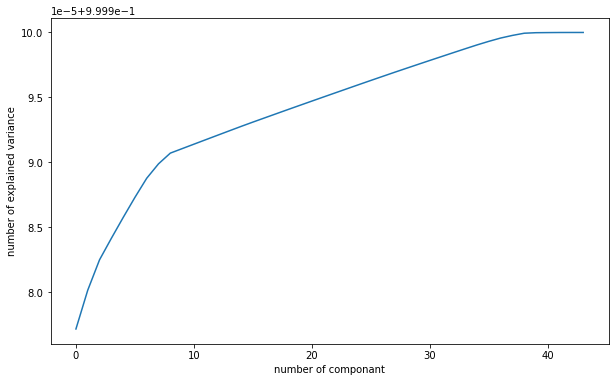

In [107]:
x_train = train_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
x_test = test_val_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)

pca = PCA().fit(x_train)

plt.figure(figsize=[10,6])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of componant")
plt.ylabel("number of explained variance")
plt.show()

In [109]:
x_train = train_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
x_test = test_val_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train = train_no_store['Sales']
y_test = test_val_no_store['Sales']

pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
    
rfr = RandomForestRegressor(n_estimators=500, max_features='sqrt', max_depth=6, n_jobs=7, random_state=123)
rfr.fit(x_train_pca, y_train)

pred_ = rfr.predict(x_test_pca)

ind_ = test_val_data[test_val_data['Open'] == 0 ].index
for i in ind_:
    pred_[i] = 0
    
print("MSE", np.sqrt(mean_squared_error(y_pred= pred_, y_true= y_test)))
print("MAE", mean_absolute_error(y_pred= pred_, y_true= y_test))

MSE 4275.482334964868
MAE 3279.7964165902813


# XGBRegressor

In [73]:
from xgboost import XGBRegressor

# model 1 with store

In [ ]:
x_train = train_with_store.drop(['Sales','Date','Open','Customers'], axis = 1)
x_test = test_val_with_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train = train_with_store['Sales']
y_test = test_val_with_store['Sales']

xgbr1 = XGBRegressor(n_estimator = 500, learning_rate = 0.5, max_depth = 6, n_jobs = -1, random_state = 123)
xgbr1.fit(x_train, y_train)
pred1 = xgbr1.predict(x_test)

ind = test_val_data[test_val_data['Open']==0].index
for i in ind:
    pred1[i] = 0
    
print("MSE", np.sqrt(mean_squared_error(y_pred= pred1, y_true=y_test)))
print("MAE", mean_absolute_error(y_pred= pred1, y_true=y_test))

[23:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




# model 2 without store

In [74]:
x_train = train_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train = train_no_store['Sales']
x_test = test_val_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_test = test_val_no_store['Sales']

xgbr2 = XGBRegressor(n_estimator = 500, learning_rate = 0.5, max_depth= 6, n_jobs = -1, random_state = 123)
xgbr2.fit(x_train, y_train)
pred2 = xgbr2.predict(x_test)

ind = test_val_data[test_val_data['Open']==0].index
for i in ind:
    pred2[i] = 0

print("MSE", np.sqrt(mean_squared_error(y_pred=pred2, y_true=y_test)))
print("MAE", mean_absolute_error(y_pred=pred2, y_true=y_test))

[21:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE 3767.569406490931
MAE 2465.080250588633


# model 3 for each seperate store

In [82]:
pred3 = np.zeros(test_val_data.shape[0])

train = train_no_store.groupby(['Store'])
test = test_no_store.groupby(['Store'])

In [85]:
for i in range (1, 1116):
    x = train.get_group(i)
    y = test.get_group(i)
    
    x_train = x.drop(['Sales','Date','Open','Customers','Store'], axis = 1)
    y_train = x['Sales']
    x_test = y.drop(['Sales','Date','Open','Customers','Store'], axis = 1)
    y_test = y['Sales']
    
    xgbr_ = XGBRegressor(n_estimator = 500,learning_rate = 0.5, max_depth = 6, n_jobs = -1,random_state = 0)
    xgbr_.fit(x_train, y_train)
    pred_ = xgbr_.predict(x_test)
    
    a = 0
    ind_ = y[y['Open']==0].index
    for j in y.index:
        if(j in ind_):
            pred3[j] = 0
        else :
            pred3[j] = pred_[a]
        a += 1

print("MSE", np.sqrt(mean_squared_error(y_pred = pred3, y_true = test_val_data['Sales'])))
print("MAE", mean_absolute_error(y_pred= pred3, y_true = test_val_data['Sales']))

[22:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

[22:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

# model 4 by applying PCA

In [90]:
x_train = train_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
x_test = test_val_no_store.drop(['Sales','Date','Open','Customers'], axis = 1)
y_train = train_no_store['Sales']
y_test = test_val_no_store['Sales']

pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
    
xgbr4 = XGBRegressor(n_estimator = 500, learning_rate = 0.5, max_depth = 6, n_jobs = -1, random_state = 123)
xgbr4.fit(x_train_pca, y_train)

pred_4 = xgbr4.predict(x_test_pca)

ind_ = test_val_data[test_val_data['Open'] == 0 ].index
for i in ind_:
    pred_4[i] = 0
    
print("MSE", np.sqrt(mean_squared_error(y_pred= pred_4, y_true= y_test)))
print("MAE", mean_absolute_error(y_pred= pred_4, y_true= y_test))

[22:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE 4090.2675983467075
MAE 2869.420004581919


# Time Series

In [91]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA

In [92]:
dateparse = lambda dates : pd.datetime.strptime(dates, "%d-%m-%Y")

In [94]:
train1 = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date', date_parser=dateparse)

In [95]:
train1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-06-30,1,2,5735,568,1,1,0,0
2015-06-30,2,2,9863,877,1,1,0,0
2015-06-30,3,2,13261,1072,1,1,0,1
2015-06-30,4,2,13106,1488,1,1,0,0
2015-06-30,5,2,6635,645,1,1,0,0


In [97]:
test_val = pd.read_csv("test_data_hidden.csv", parse_dates=['Date'], index_col='Date', date_parser= dateparse)

In [98]:
test_val.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [99]:
train = train1[['Store','DayOfWeek','Sales','Open']]
test_val = test_val[['Store','DayOfWeek','Sales','Open']]

In [100]:
train.sort_values(['Date'], axis=0, inplace = True)
test_val.sort_values(['Date'], axis = 0, inplace = True)

In [101]:
train.head()

,Store,DayOfWeek,Sales,Open
Date,,,,
2014-01-01,1115,3,0,0
2014-01-01,379,3,0,0
2014-01-01,378,3,0,0
2014-01-01,377,3,0,0
2014-01-01,376,3,0,0


In [102]:
test_val.head()

,Store,DayOfWeek,Sales,Open
Date,,,,
2015-07-01,1115,3,7701,1
2015-07-01,379,3,5897,1
2015-07-01,378,3,8340,1
2015-07-01,377,3,10801,1
2015-07-01,376,3,11038,1


## Store 1

In [103]:
train_store1 = train[train['Store'] == 1]
test_store1 = test_val[test_val['Store'] == 1]

In [104]:
train_store1.head()

,Store,DayOfWeek,Sales,Open
Date,,,,
2014-01-01,1,3,0,0
2014-01-02,1,4,4969,1
2014-01-03,1,5,4190,1
2014-01-04,1,6,5173,1
2014-01-05,1,7,0,0


In [105]:
train_store1.shape

(546, 4)

In [106]:
test_store1.head()

,Store,DayOfWeek,Sales,Open
Date,,,,
2015-07-01,1,3,5223,1
2015-07-02,1,4,5558,1
2015-07-03,1,5,4665,1
2015-07-04,1,6,4797,1
2015-07-05,1,7,0,0


In [107]:
test_store1.shape

(31, 4)

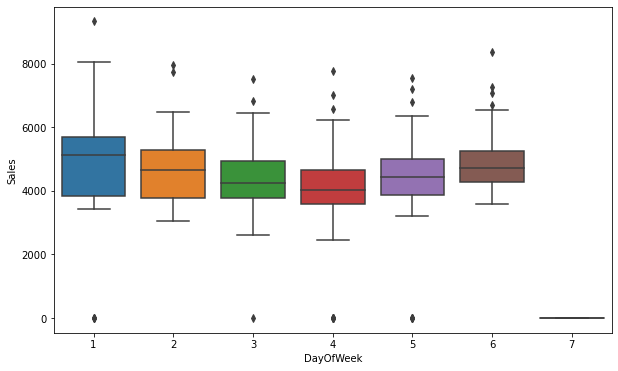

In [109]:
plt.figure(figsize=[10,6])
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data= train_store1)
plt.show()

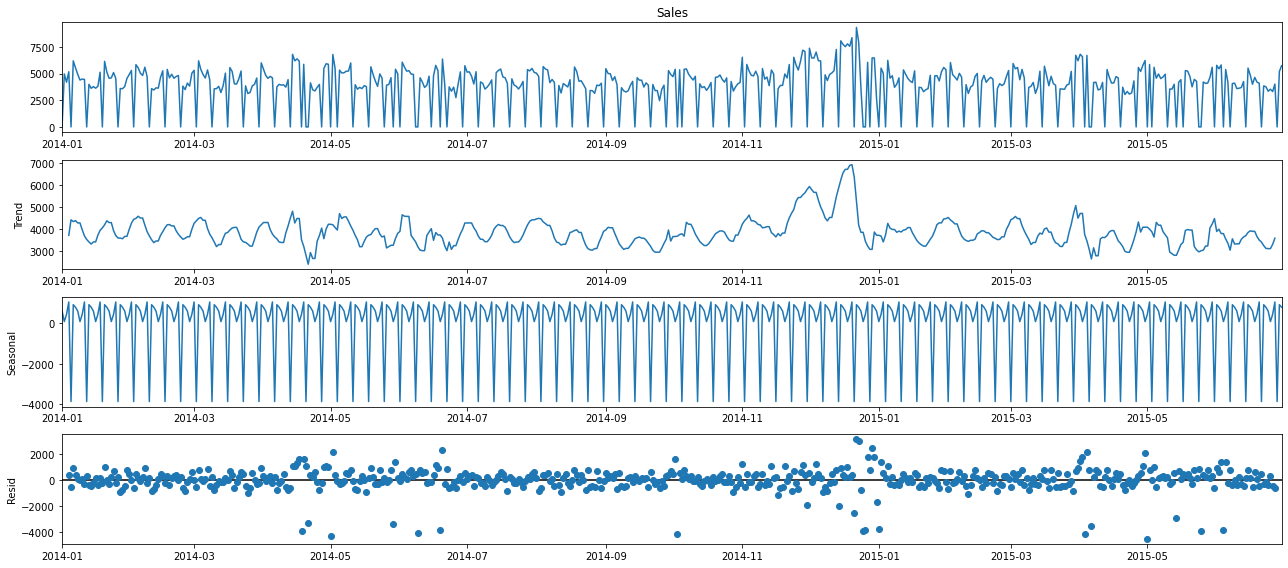

In [110]:
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(train_store1['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [111]:
def test_Stationarity(timeSeries) :
    
    rollmean = timeSeries.rolling(12).mean()
    rollstd = timeSeries.rolling(12).std()
    
    #plt.figure(figsize=[10,10])
    plt.plot(timeSeries, color='blue', label = 'Original')
    plt.plot(rollmean, color= 'red', label = 'rolling mean')
    plt.plot(rollstd, color='green', label = 'rolling std')
    
    plt.legend(loc='best')
    plt.title("Rolling mean and rolling std")
    plt.show()
    
    print("Result of dickyfuller test")
    adtest = adfuller(timeSeries, autolag='AIC')
    result = pd.Series(adtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in adtest[4].items():
        result['Critical value (%s)'%key] = value
    print(result)    

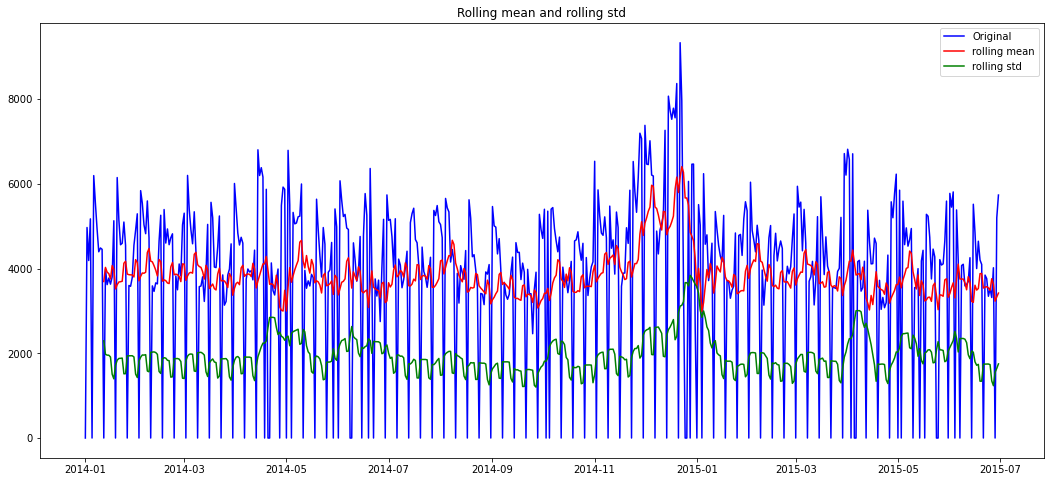

Result of dickyfuller test
Test Statistic                  -4.120130
p-value                          0.000897
#Lags Used                      16.000000
Number of Observations Used    529.000000
Critical value (1%)             -3.442772
Critical value (5%)             -2.867019
Critical value (10%)            -2.569688
dtype: float64


In [112]:
test_Stationarity(train_store1['Sales'])

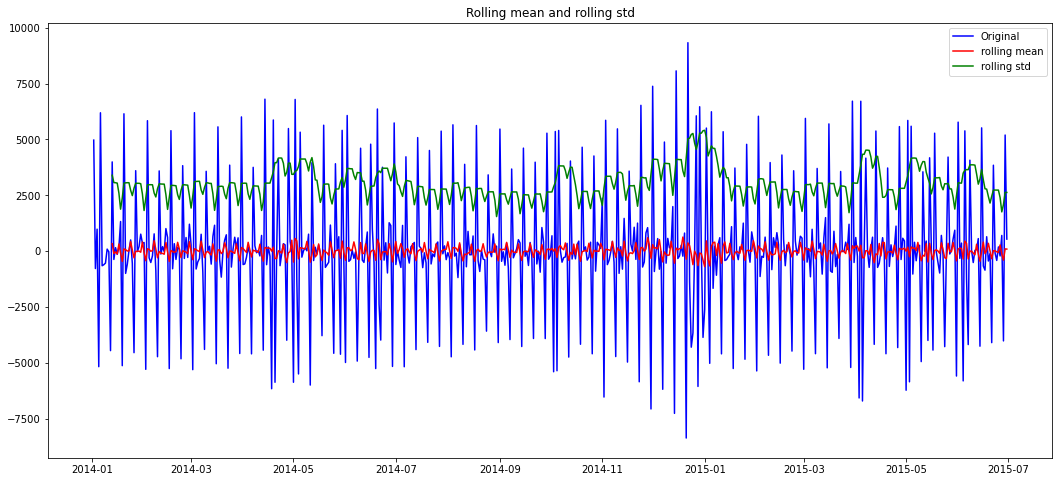

Result of dickyfuller test
Test Statistic                -9.828889e+00
p-value                        5.099773e-17
#Lags Used                     1.900000e+01
Number of Observations Used    5.250000e+02
Critical value (1%)           -3.442867e+00
Critical value (5%)           -2.867061e+00
Critical value (10%)          -2.569710e+00
dtype: float64


In [113]:
first_diff = train_store1['Sales'] - train_store1['Sales'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_Stationarity(first_diff)

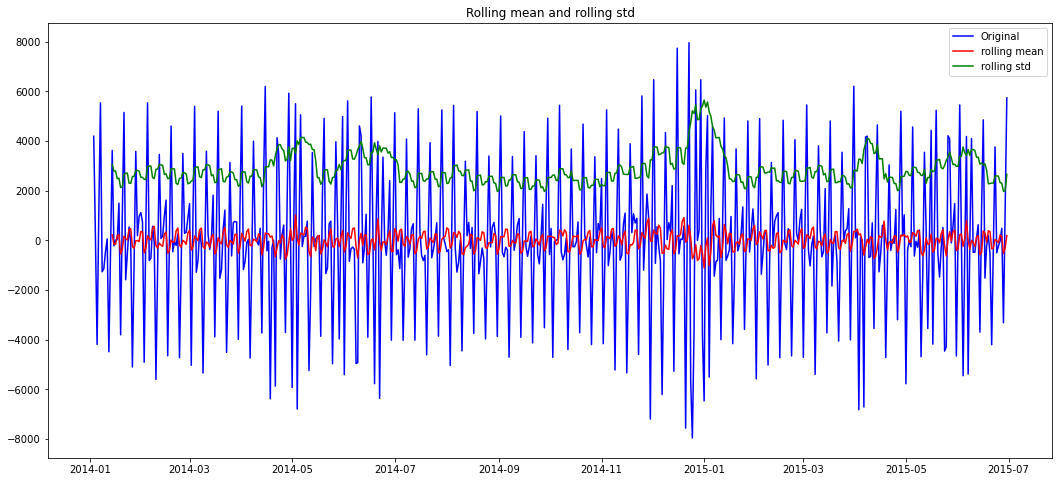

Result of dickyfuller test
Test Statistic                -9.546903e+00
p-value                        2.634421e-16
#Lags Used                     1.800000e+01
Number of Observations Used    5.250000e+02
Critical value (1%)           -3.442867e+00
Critical value (5%)           -2.867061e+00
Critical value (10%)          -2.569710e+00
dtype: float64


In [115]:
Second_diff = train_store1['Sales'] - train_store1['Sales'].shift(2)
Second_diff = Second_diff.dropna(inplace = False)
test_Stationarity(Second_diff)

In [117]:
#ARIMA model
arima_model = ARIMA(train_store1['Sales'], (9,1,9),freq='D')
res_=arima_model.fit(disp=False)
Y_pred = res_.forecast(steps=31)[0]
print('MSE',np.sqrt(mean_squared_error(Y_pred,test_store1['Sales'])))
print('MAE',mean_absolute_error(Y_pred,test_store1['Sales']))

MSE 630.9716521041155
MAE 466.1205734172512


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Project task - 3

### LSTM for store 1

In [74]:
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [119]:
train1_values = train_store1.iloc[:, 2:3].values
print(train1_values[20,0])
print(len( train1_values))

5151
546


In [120]:
sc = MinMaxScaler(feature_range=(0,1))

In [121]:
train_values =  sc.fit_transform(train1_values)

In [122]:
train_values[0:30,0] 

array([0.        , 0.53252599, 0.44904083, 0.5543886 , 0.        ,
       0.66380881, 0.59361269, 0.52845354, 0.47111778, 0.48076305,
       0.47733362, 0.        , 0.42803558, 0.3880613 , 0.4046726 ,
       0.38924017, 0.40756618, 0.54956596, 0.        , 0.65887901,
       0.55203086, 0.48890794, 0.49265888, 0.54635087, 0.48719323,
       0.        , 0.38591791, 0.38377452, 0.4060658 , 0.48751474])

In [123]:
x_train = []
y_train = []

for i in range (30,546):
    x_train.append(train_values[i-30:i,0])
    y_train.append(train_values[30,0])

In [124]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [125]:
x_train[0]

array([0.        , 0.53252599, 0.44904083, 0.5543886 , 0.        ,
       0.66380881, 0.59361269, 0.52845354, 0.47111778, 0.48076305,
       0.47733362, 0.        , 0.42803558, 0.3880613 , 0.4046726 ,
       0.38924017, 0.40756618, 0.54956596, 0.        , 0.65887901,
       0.55203086, 0.48890794, 0.49265888, 0.54635087, 0.48719323,
       0.        , 0.38591791, 0.38377452, 0.4060658 , 0.48751474])

In [126]:
x_train.shape

(516, 30)

In [127]:
y_train.shape

(516,)

In [128]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [129]:
x_train.shape

(516, 30, 1)

In [130]:
regressor = Sequential()
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(LSTM(units = 50))
regressor.add(Dense(units = 1))

In [131]:
regressor.compile(optimizer= 'adam', loss='mean_squared_error')

In [132]:
regressor.fit(x_train, y_train, epochs=100, shuffle=False, batch_size=64)

Epoch 1/100
9/9 [==============================] - 8s 58ms/step - loss: 0.1270
Epoch 2/100
9/9 [==============================] - 0s 54ms/step - loss: 0.0162
Epoch 3/100
9/9 [==============================] - 0s 53ms/step - loss: 0.0055
Epoch 4/100
9/9 [==============================] - 0s 55ms/step - loss: 0.0014
Epoch 5/100
9/9 [==============================] - 0s 55ms/step - loss: 9.9411e-04
Epoch 6/100
9/9 [==============================] - 0s 54ms/step - loss: 4.2630e-04
Epoch 7/100
9/9 [==============================] - 0s 54ms/step - loss: 4.7556e-04
Epoch 8/100
9/9 [==============================] - 0s 53ms/step - loss: 3.2581e-04
Epoch 9/100
9/9 [==============================] - 0s 53ms/step - loss: 3.7150e-04
Epoch 10/100
9/9 [==============================] - 0s 49ms/step - loss: 3.1694e-04
Epoch 11/100
9/9 [==============================] - 0s 45ms/step - loss: 3.2955e-04
Epoch 12/100
9/9 [==============================] - 0s 44ms/step - loss: 3.1234e-04
Epoch 13/100
9/9 

In [133]:
total_data = pd.concat((train_store1['Sales'], test_store1['Sales']), axis=0)

In [134]:
total_data.shape

(577,)

In [135]:
inputs = total_data[len(total_data) - len(test_store1) - 30:].values

In [136]:
inputs

array([5774, 5450, 5809,    0, 5384, 4183,    0, 4071, 4102, 3591, 3627,
       3695, 4256,    0, 5518, 4852, 4000, 4645, 4202, 4097,    0, 3846,
       3762, 3346, 3533, 3317, 4019,    0, 5197, 5735, 5223, 5558, 4665,
       4797,    0, 4359, 3650, 3797, 3897, 3808, 3530,    0, 5054, 5042,
       4767, 4427, 4852, 4406,    0, 4395, 3558, 3464, 3769, 3706, 4364,
          0, 6102, 5011, 4782, 5020, 5263], dtype=int64)

In [137]:
inputs.shape

(61,)

In [138]:
inputs = inputs.reshape(-1,1)

In [139]:
inputs.shape

(61, 1)

In [140]:
inputs = sc.transform(inputs)

In [141]:
x_test = []

for i in range (30, 61):
    x_test.append(inputs[i-30:i, 0])

In [142]:
x_test = np.array(x_test)

In [143]:
x_test.shape

(31, 30)

In [144]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [145]:
x_test.shape

(31, 30, 1)

In [146]:
pred = regressor.predict(x_test)

In [147]:
pred

array([[0.52589434],
       [0.5255657 ],
       [0.52519107],
       [0.5246863 ],
       [0.52515215],
       [0.5247717 ],
       [0.5246041 ],
       [0.5252062 ],
       [0.5251733 ],
       [0.5251555 ],
       [0.52522546],
       [0.5252968 ],
       [0.5253832 ],
       [0.52537644],
       [0.52602804],
       [0.5258274 ],
       [0.5256507 ],
       [0.5255523 ],
       [0.5253253 ],
       [0.52518016],
       [0.5250647 ],
       [0.52568316],
       [0.5256743 ],
       [0.52568495],
       [0.52576053],
       [0.52580106],
       [0.5258941 ],
       [0.52587324],
       [0.52642494],
       [0.52626085],
       [0.5259795 ]], dtype=float32)

In [148]:
pred_ = sc.inverse_transform(pred)

In [149]:
pred_

array([[4907.12  ],
       [4904.053 ],
       [4900.558 ],
       [4895.8477],
       [4900.195 ],
       [4896.6445],
       [4895.0806],
       [4900.699 ],
       [4900.392 ],
       [4900.2256],
       [4900.879 ],
       [4901.5444],
       [4902.3506],
       [4902.2876],
       [4908.3677],
       [4906.4956],
       [4904.8467],
       [4903.928 ],
       [4901.8105],
       [4900.456 ],
       [4899.379 ],
       [4905.1494],
       [4905.067 ],
       [4905.1665],
       [4905.8716],
       [4906.2495],
       [4907.1177],
       [4906.9233],
       [4912.0713],
       [4910.54  ],
       [4907.915 ]], dtype=float32)

In [150]:
print("MSE", np.sqrt(mean_squared_error(y_pred= pred_, y_true= test_store1['Sales'])))
print("MAE", mean_absolute_error(y_pred= pred_, y_true= test_store1['Sales']))

MSE 1910.5474294809158
MAE 1186.7295866935483


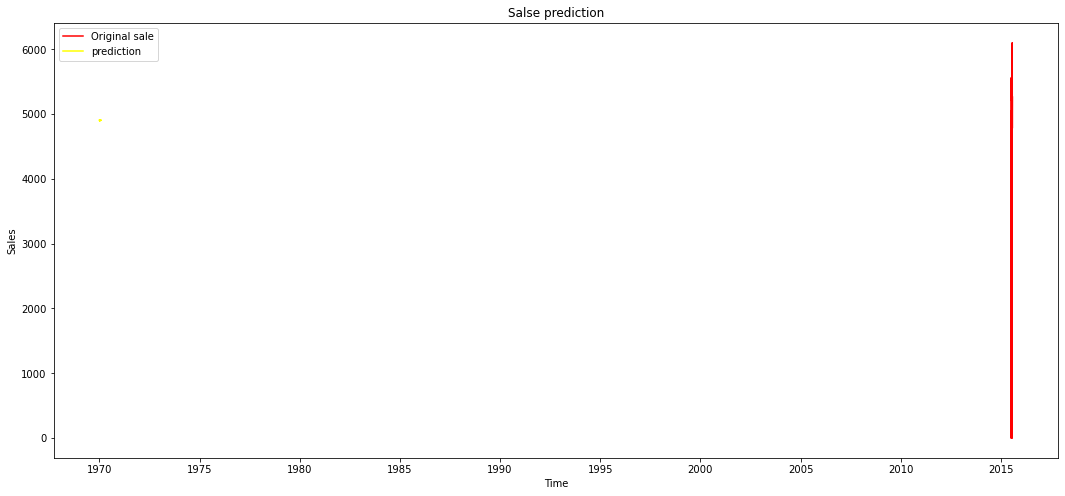

In [152]:
plt.plot(test_store1['Sales'], color = 'red', label = 'Original sale')
plt.plot(pred_, color = 'yellow', label = 'prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Salse prediction')
plt.legend(loc='best')
plt.show()

# ANN model with store

In [75]:
x_train = train_with_store.drop(['Sales','Date','Customers'], axis = 1).values
x_test_val = test_val_with_store.drop(['Sales','Date','Customers'], axis = 1).values
y_train = pd.DataFrame(train_with_store['Sales'])
y_test_val = test_val_with_store['Sales']

In [76]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
y_train_ = sc.fit_transform(y_train)

In [77]:
model_1 = Sequential()
model_1.add(Dense(units = 100, activation = 'relu', input_dim = x_train.shape[1]))
model_1.add(Dropout(0.2))
model_1.add(Dense(units = 64, activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(units = 32, activation = 'relu'))
model_1.add(Dense(units = 1, activation = 'linear'))

In [78]:
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
model_1.fit(x_train, y_train_, epochs= 10, batch_size=64, shuffle=False)

Epoch 1/10
7442/7442 [==============================] - 19s 2ms/step - loss: 0.0011
Epoch 2/10
7442/7442 [==============================] - 18s 2ms/step - loss: 5.7176e-04
Epoch 3/10
7442/7442 [==============================] - 18s 2ms/step - loss: 5.2148e-04
Epoch 4/10
7442/7442 [==============================] - 18s 2ms/step - loss: 4.7960e-04
Epoch 5/10
7442/7442 [==============================] - 18s 2ms/step - loss: 4.5100e-04
Epoch 6/10
7442/7442 [==============================] - 18s 2ms/step - loss: 4.3322e-04
Epoch 7/10
7442/7442 [==============================] - 18s 2ms/step - loss: 4.2145e-04
Epoch 8/10
7442/7442 [==============================] - 18s 2ms/step - loss: 4.0329e-04
Epoch 9/10
7442/7442 [==============================] - 18s 2ms/step - loss: 3.9616e-04
Epoch 10/10
7442/7442 [==============================] - 18s 2ms/step - loss: 3.8728e-04


In [80]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               115900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 124,477
Trainable params: 124,477
Non-trai

In [81]:
pred_1 = model_1.predict(x_test_val, batch_size=64)

In [82]:
pred_1 = sc.inverse_transform(pred_1)

In [83]:
print("MSE", np.sqrt(mean_squared_error(y_pred= pred_1, y_true= y_test_val)))
print("MAE", mean_absolute_error(y_pred= pred_1, y_true= y_test_val))

MSE 2821.024368794982
MAE 1572.0695322706372


# ANN model without store

In [84]:
x_train = train_no_store.drop(['Sales','Date','Customers'], axis = 1).values
x_test_val = test_val_no_store.drop(['Sales','Date','Customers'], axis = 1).values
y_train = pd.DataFrame(train_no_store['Sales'])
y_test_val = test_val_no_store['Sales']

In [85]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
y_train_ = sc.fit_transform(y_train)

In [86]:
model_2 = Sequential()
model_2.add(Dense(units = 100, activation = 'relu', input_dim = x_train.shape[1]))
model_2.add(Dropout(0.2))
model_2.add(Dense(units = 64, activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(units = 32, activation = 'relu'))
model_2.add(Dense(units = 1, activation = 'linear'))

In [87]:
model_2.compile(optimizer='adam', loss='mean_squared_error')

In [88]:
model_2.fit(x_train, y_train_, epochs=10, batch_size=64, shuffle=False)

Epoch 1/10
7442/7442 [==============================] - 16s 2ms/step - loss: 1.7401
Epoch 2/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0075
Epoch 3/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0052
Epoch 4/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0052
Epoch 5/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0051
Epoch 6/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0051
Epoch 7/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0050
Epoch 8/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0051
Epoch 9/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0052
Epoch 10/10
7442/7442 [==============================] - 15s 2ms/step - loss: 0.0050


In [89]:
pred_2 = model_2.predict(x_test_val, batch_size=64)

In [90]:
pred_2 = sc.inverse_transform(pred_2)

In [91]:
print("MSE", np.sqrt(mean_squared_error(y_pred= pred_2, y_true= y_test_val)))
print("MAE", mean_absolute_error(y_pred= pred_2, y_true= y_test_val))

MSE 3602.774714920242
MAE 2665.3873671123474
